In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import io
from PIL import Image
import re
import os
import time
import pickle
from bs4 import BeautifulSoup
import urllib.request as req
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

In [3]:
url = 'https://keiba-lv-st.jp/'

# 取得先URLにアクセス
res = req.urlopen(url)

# 対象を抽出
soup = BeautifulSoup(res, 'html.parser');
print(soup.prettify())

<!DOCTYPE html>
<html lang="ja">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="地方競馬ライブ | 地方競馬のライブ映像および過去レース映像の配信サイトです。" name="description">
   <meta content="地方競馬,競馬,映像,大井,南関東,ばんえい,モバイル,ケータイ,スマホ,レース映像,ライブ,オッズ" name="keywords"/>
   <title>
    地方競馬ライブ
   </title>
   <link href="./favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
   <script src="api/JsGenerate.php">
   </script>
   <script src="js/redirect.js">
   </script>
   <link href="css/movie.css" media="screen" rel="stylesheet"/>
   <link href="css/style.css" media="screen" rel="stylesheet"/>
   <link href="css/plugins/jquery.powertip.min.css" media="screen" rel="stylesheet"/>
   <link href="css/plugins/flick/jquery-ui-1.10.4.custom.min.css" media="screen" rel="stylesheet"/>
   <script src="js/vendor/jquery-1.10.2.min.js" type="text/javascript">
   </script>
   <script src="js/vendor/fastclick.min.js" type="text/javascript">
   </script>
   <script src="js/vendor/u

In [ ]:
# ブラウザのオプションを格納する変数もらう
options = Options()

# Headlessモードを有効にする（コメントアウトするとブラウザが実際に立ち上がります）
# options.set_headless(True)

driver = webdriver.Chrome(chrome_options=options, executable_path="")

# ブラウザでアクセスする
driver.get("https://keiba-lv-st.jp/")
time.sleep(5) # 5s

# HTMLを文字コードをUTF-8に変換してから取得します。
html = driver.page_source.encode('utf-8')


# # BeautifulSoupで扱えるようにパースします
# soup = BeautifulSoup(html, "html.parser")

# # idがheikinの要素を表示
# print(soup.select_one("#trackid=kawasaki&racenumber=&date=20221110"))

In [ ]:
options = Options() 
# options.headless = True
options.add_argument('--headless')                 # headlessモードを使用する
options.add_argument('--disable-gpu')              # headlessモードで暫定的に必要なフラグ(そのうち不要になる)
options.add_argument('--disable-extensions')       # すべての拡張機能を無効にする。ユーザースクリプトも無効にする
options.add_argument('--proxy-server="direct://"') # Proxy経由ではなく直接接続する
options.add_argument('--proxy-bypass-list=*')      # すべてのホスト名
options.add_argument('--start-maximized')      
driver = Chrome(executable_path="", options=options)
# driver = Chrome(executable_path="")

driver.get("https://simple.keiba-lv-st.jp/?track=kouchi")
# aタグのhrefをelementでリスト化


<selenium.webdriver.remote.webelement.WebElement (session="30f1cd78794ca39b6de9136cecaa85e0", element="98ce4e86-a186-4ef5-85d9-cc180bacb43e")>


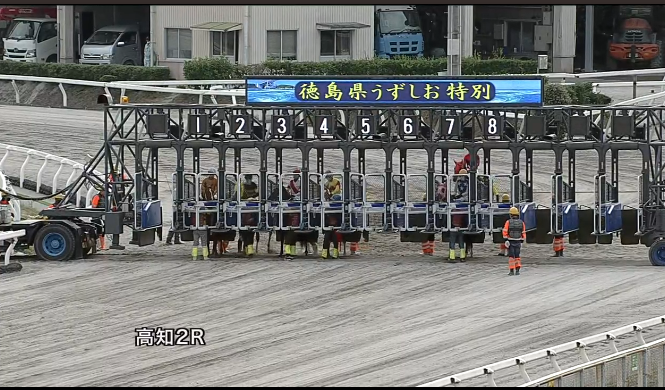

In [80]:
# 画質変更ボタンクリック
elem = driver.find_element(By.XPATH,'/html/body/div/div/div[2]/div[1]/div[1]/div[2]/button')
elem.click()
# 2000p選択
elem = driver.find_element(By.XPATH,'/html/body/div/div/div[2]/div[1]/div[1]/div[2]/ul/li[6]/a')
elem.click()
# # 拡大画面クリック
elem = driver.find_element(By.XPATH,'//*[@id="player-controls-player_1"]/img[2]')
print(elem)
elem.click()

img_png = driver.get_screenshot_as_png()
img_io = io.BytesIO(img_png)
img = Image.open(img_io)
img = img.crop((55, 100, 720, 490))
img

In [81]:
driver.quit()